# Import libraries and Load Data

In [148]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import os
import missingno as msno

In [106]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [107]:
def load_data():
    path=str(os.getcwd())+"\data"
    df_list=[]
    
    for file_name in os.listdir(path):
        df=reduce_mem_usage(pd.read_csv(path+'\\'+file_name))
        df_list.append(df)
        
    return [df for df in df_list]

In [108]:
subm_df, test_df, train_labels_df, train_df=load_data()

Mem. usage decreased to  0.17 Mb (25.0% reduction)
Mem. usage decreased to  3.71 Mb (18.1% reduction)
Mem. usage decreased to  0.68 Mb (25.0% reduction)
Mem. usage decreased to 14.84 Mb (18.1% reduction)


# Explore the Data

## General information

In [135]:
for df_name, df in zip(["Submission File", "Test File","Train Label File","Train File"],[subm_df,test_df,train_labels_df,train_df]):
    print(df_name,"General Information-----------------------------------------------------------\n")
    df.info()
    print("\n")

Submission File General Information-----------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            14850 non-null  int32 
 1   status_group  14850 non-null  object
dtypes: int32(1), object(1)
memory usage: 174.1+ KB


Test File General Information-----------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int32  
 1   amount_tsh             14850 non-null  float32
 2   date_recorded          14850 non-null  object 
 3   funder                 13981 non-null  object 
 4   gps_height             14850 non-null  int16  
 5   instal

## Missing Data

In [145]:
for df_name, df in zip(["Submission File", "Test File","Train Label File","Train File"],[subm_df,test_df,train_labels_df,train_df]):
    print(df_name,"Missing Data-----------------------------------------------------------")
    print("\nAbsolute\n")
    print(df.isnull().sum())
    print("\nRelative in %\n")
    print(df.isnull().sum()/df.shape[0]*100)
    print("\n")

Submission File Missing Data-----------------------------------------------------------

Absolute

id              0
status_group    0
dtype: int64

Relative in %

id              0.0
status_group    0.0
dtype: float64


Test File Missing Data-----------------------------------------------------------

Absolute

id                          0
amount_tsh                  0
date_recorded               0
funder                    869
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7092
permit                    

<Figure size 1440x576 with 0 Axes>

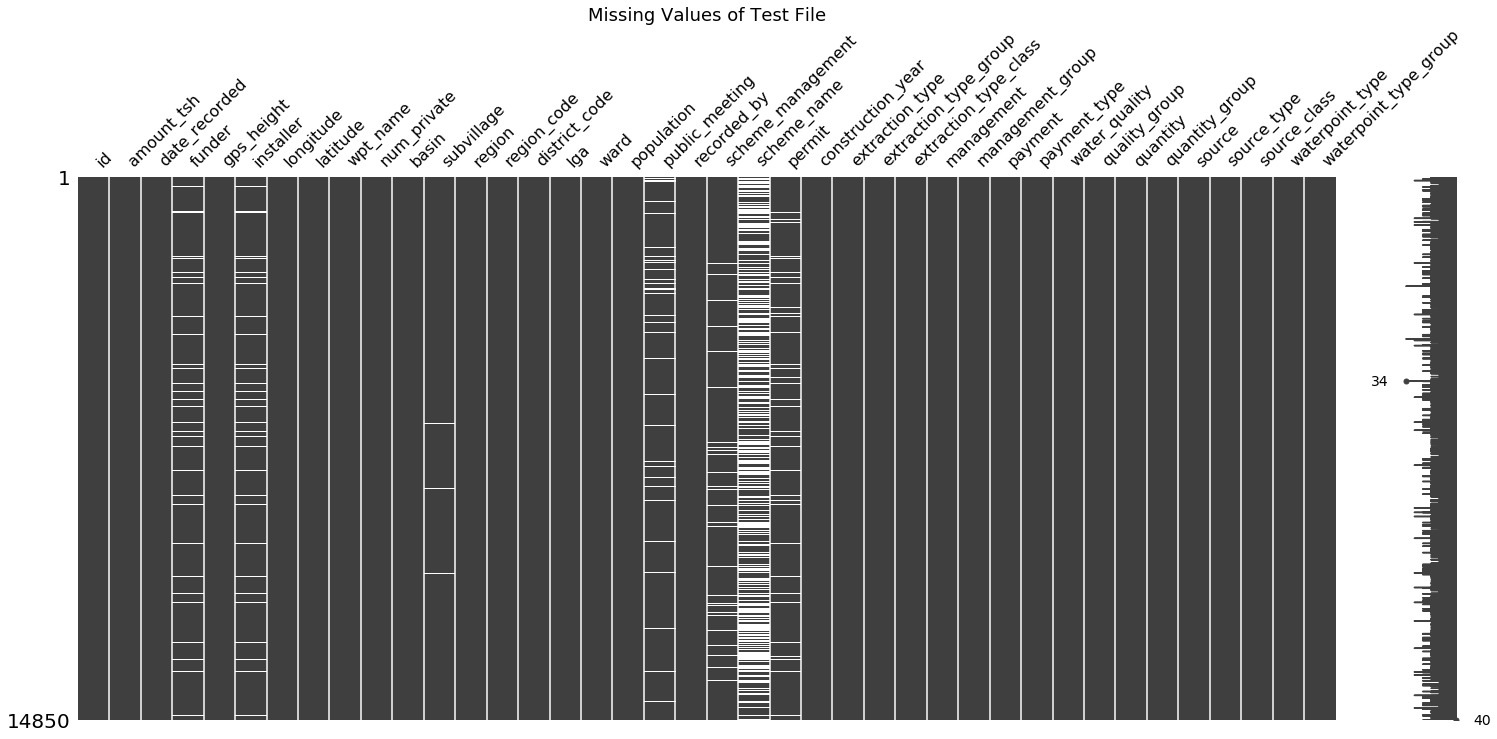

<Figure size 1440x576 with 0 Axes>

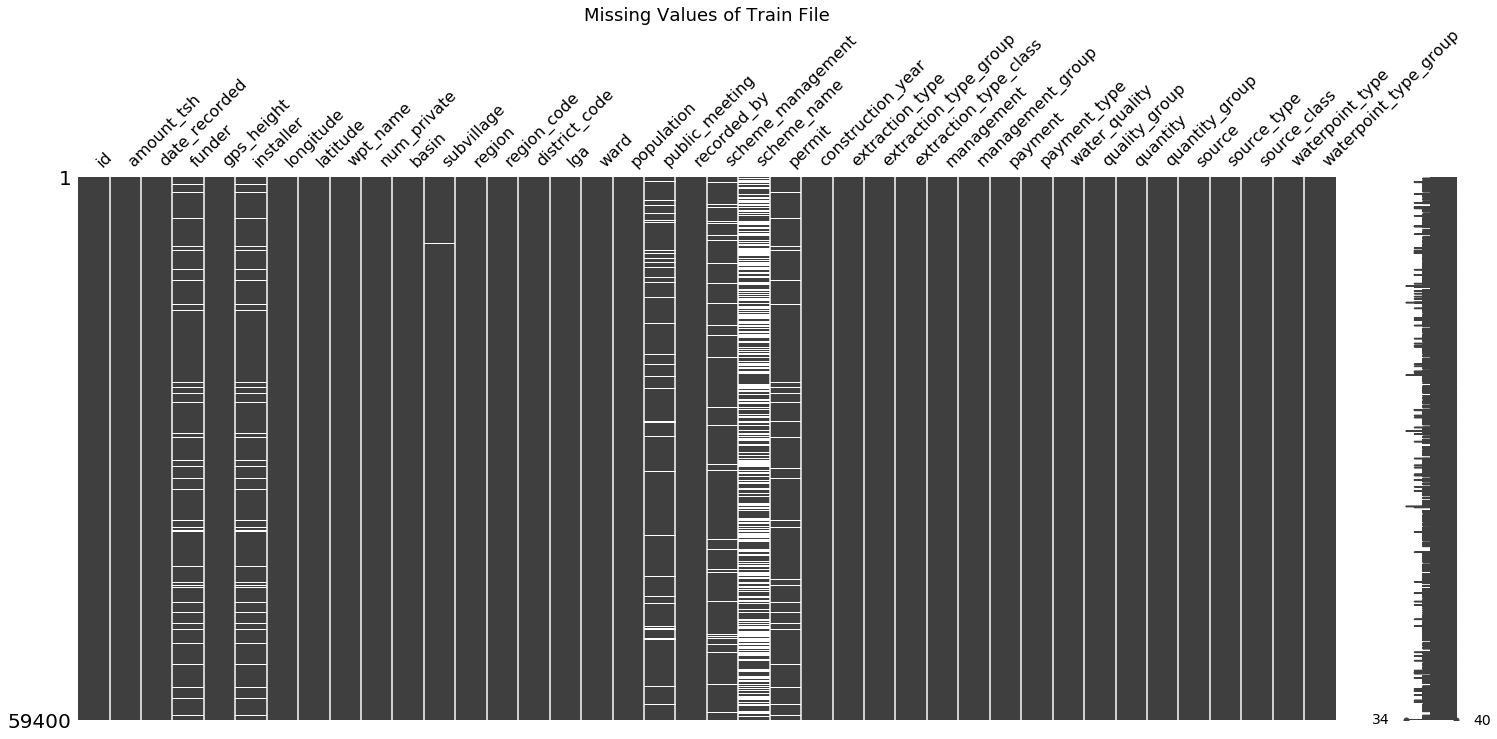

In [154]:
for df_name, df in zip(["Test File","Train File"],[test_df,train_df]):
    plt.figure(figsize=(20,8))
    msno.matrix(df)
    plt.title("Missing Values of {}".format(df_name),fontdict={"fontsize":18});